In [1]:
import os
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT_DIR = '/home/sjb/Projects/Research/LinkedIn_OB/data/company_level_individual_stay_term'

In [3]:
file_paths = glob(os.path.join(ROOT_DIR, '*.csv'))

In [4]:
def get_short_org_name(file_path):
    basename = os.path.basename(file_path)
    short_name = basename.replace('_person_stay_term.csv', '')
    return short_name

In [5]:
stat_results = []

for fp in file_paths:
    temp = pd.read_csv(fp)
    short_name = get_short_org_name(fp)
    n_data = temp.shape[0]
    n_valid_data = temp.dropna(subset=['n_months']).shape[0]
    n_current_job = temp['is_current_job'].sum()
    n_other_nulls = temp['n_months'].isnull().sum() - n_current_job
    
    stat_results.append({
        'file_path': fp,
        'company_name': short_name,
        'n_data': n_data,
        'n_valid_data': n_valid_data,
        'n_current_job': n_current_job,
        'n_other_nulls': n_other_nulls,
        'mean_stay_term': temp['n_months'].mean(),
        'median_stay_term': temp['n_months'].median(),
    })

In [6]:
stat_df = pd.DataFrame(stat_results)

In [7]:
stat_df.head()

,file_path,company_name,n_data,n_valid_data,n_current_job,n_other_nulls,mean_stay_term,median_stay_term
0,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,cdmsmith,1065,749,313,3,52.453939,36.0
1,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,jabil,1271,885,380,6,43.423729,25.0
2,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,send-out-cards,1162,246,903,13,32.121951,26.5
3,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,texas-tech-university,2092,1472,595,25,30.610734,24.0
4,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,sikorsky-aircraft,1390,988,396,6,59.702429,32.0


Text(0.5, 1.0, 'Distribution of Median Stay (Months)')

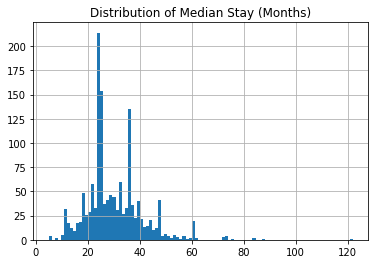

In [20]:
stat_df['median_stay_term'].hist(bins=100)
plt.title('Distribution of Median Stay (Months)')

In [10]:
stat_df[stat_df['median_stay_term']> 45]

,file_path,company_name,n_data,n_valid_data,n_current_job,n_other_nulls,mean_stay_term,median_stay_term
16,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,astrazeneca,4278,3289,980,9,68.189723,49.0
30,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,alcoa,2135,1744,384,7,74.438647,48.0
69,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,ibm,54169,41521,12412,236,77.475542,48.0
87,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,sanofi-,5469,4513,933,23,72.789719,57.0
90,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,lasalle-bank,1059,1051,8,0,74.808754,52.0
...,...,...,...,...,...,...,...,...
1387,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,tektronix,1551,1346,199,6,82.543091,57.5
1388,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,united-airlines,3913,2872,1029,12,82.342618,50.0
1392,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,unisys,7303,6658,633,12,77.808801,48.0
1400,/home/sjb/Projects/Research/LinkedIn_OB/data/c...,ford-motor-credit-company,1218,1111,106,1,86.181818,62.0


In [13]:
stat_df.to_csv('/home/sjb/Projects/Research/LinkedIn_OB/data/company_level_individual_stay_term_stat.csv', index=False)

In [15]:
stat_df['present_proportion'] = stat_df['n_current_job'] / stat_df['n_data']

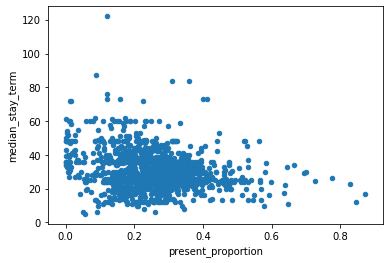

In [17]:
stat_df.plot(x='present_proportion', y='median_stay_term', kind='scatter')

In [11]:
missing_stat = stat_df[['n_data', 'n_valid_data', 'n_current_job']].sum()

In [12]:
missing_stat / missing_stat['n_data']

n_data           1.000000
n_valid_data     0.743887
n_current_job    0.251536
dtype: float64

In [23]:
1 - (0.743887)

0.25611300000000004